<a href="https://colab.research.google.com/github/NGProg/load_duration_curve/blob/main/load_duration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotting a Load-Duration Curve Using Python

In [ ]:
#load the required modules
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

In [ ]:
# initialise a dictionary with the load data.
load_data = {'Hour':[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], 
        'Load':[39.0, 39.2, 37.6, 36.8, 36.4, 36.2, 37.4, 41.4, 45.6, 48.8, 53.0, 53.6, 53.2, 54.0, 53.8, 52.8, 50.8, 44.4, 46.8, 47.4, 46.4, 44.0, 42.4, 40.6]
        }
print(load_data)

{'Hour': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], 'Load': [39.0, 39.2, 37.6, 36.8, 36.4, 36.2, 37.4, 41.4, 45.6, 48.8, 53.0, 53.6, 53.2, 54.0, 53.8, 52.8, 50.8, 44.4, 46.8, 47.4, 46.4, 44.0, 42.4, 40.6]}


In [ ]:
# Convert dictionary to DataFrame and print it
load_df = pd.DataFrame(load_data)
print(load_df)

    Hour  Load
0      0  39.0
1      1  39.2
2      2  37.6
3      3  36.8
4      4  36.4
5      5  36.2
6      6  37.4
7      7  41.4
8      8  45.6
9      9  48.8
10    10  53.0
11    11  53.6
12    12  53.2
13    13  54.0
14    14  53.8
15    15  52.8
16    16  50.8
17    17  44.4
18    18  46.8
19    19  47.4
20    20  46.4
21    21  44.0
22    22  42.4
23    23  40.6


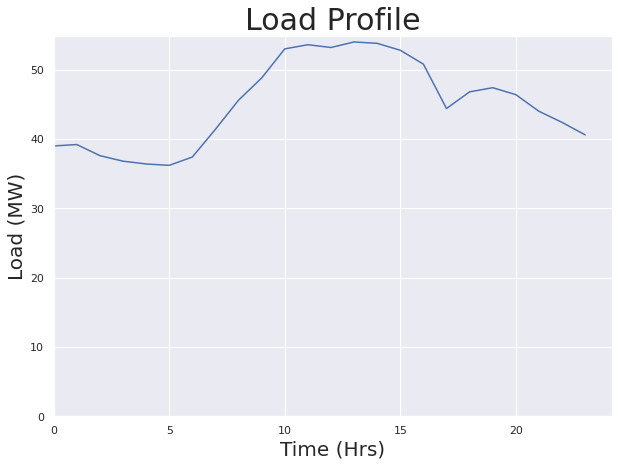

In [ ]:
#Plot the load profile
sb.set(rc={"figure.figsize":(10, 7)})
p = sb.lineplot(x = "Hour", y = "Load", data = load_df)
plt.ylim(0, None)
plt.xlim(0, None)
p.set_title("Load Profile", fontsize = 30)
p.set_xlabel("Time (Hrs)", fontsize = 20)
p.set_ylabel("Load (MW)", fontsize = 20)
plt.show()

In [ ]:
#Add a column for the time interval for which the loads were recorded
load_df['interval'] = 1
print(load_df)

    Hour  Load  interval
0      0  39.0         1
1      1  39.2         1
2      2  37.6         1
3      3  36.8         1
4      4  36.4         1
5      5  36.2         1
6      6  37.4         1
7      7  41.4         1
8      8  45.6         1
9      9  48.8         1
10    10  53.0         1
11    11  53.6         1
12    12  53.2         1
13    13  54.0         1
14    14  53.8         1
15    15  52.8         1
16    16  50.8         1
17    17  44.4         1
18    18  46.8         1
19    19  47.4         1
20    20  46.4         1
21    21  44.0         1
22    22  42.4         1
23    23  40.6         1


In [ ]:

#Sort the DataFrame by the loads, in descending order of magnitude
load_df_sorted = load_df.sort_values(by=['Load'], ascending = False)
print(load_df_sorted) 

    Hour  Load  interval
13    13  54.0         1
14    14  53.8         1
11    11  53.6         1
12    12  53.2         1
10    10  53.0         1
15    15  52.8         1
16    16  50.8         1
9      9  48.8         1
19    19  47.4         1
18    18  46.8         1
20    20  46.4         1
8      8  45.6         1
17    17  44.4         1
21    21  44.0         1
22    22  42.4         1
7      7  41.4         1
23    23  40.6         1
1      1  39.2         1
0      0  39.0         1
2      2  37.6         1
6      6  37.4         1
3      3  36.8         1
4      4  36.4         1
5      5  36.2         1


In [ ]:
#Use the cumsum() function to to add a column with the duration for which the system load is greater than or equal to each load
load_df_sorted['duration'] = load_df_sorted['interval'].cumsum()
print(load_df_sorted)

    Hour  Load  interval  duration
13    13  54.0         1         1
14    14  53.8         1         2
11    11  53.6         1         3
12    12  53.2         1         4
10    10  53.0         1         5
15    15  52.8         1         6
16    16  50.8         1         7
9      9  48.8         1         8
19    19  47.4         1         9
18    18  46.8         1        10
20    20  46.4         1        11
8      8  45.6         1        12
17    17  44.4         1        13
21    21  44.0         1        14
22    22  42.4         1        15
7      7  41.4         1        16
23    23  40.6         1        17
1      1  39.2         1        18
0      0  39.0         1        19
2      2  37.6         1        20
6      6  37.4         1        21
3      3  36.8         1        22
4      4  36.4         1        23
5      5  36.2         1        24


In [ ]:
#Calculate the percentage of time for which the system load is greater than or equal to each load
load_df_sorted['percentage'] = load_df_sorted['duration']*100/24
print(load_df_sorted)

    Hour  Load  interval  duration  percentage
13    13  54.0         1         1    4.166667
14    14  53.8         1         2    8.333333
11    11  53.6         1         3   12.500000
12    12  53.2         1         4   16.666667
10    10  53.0         1         5   20.833333
15    15  52.8         1         6   25.000000
16    16  50.8         1         7   29.166667
9      9  48.8         1         8   33.333333
19    19  47.4         1         9   37.500000
18    18  46.8         1        10   41.666667
20    20  46.4         1        11   45.833333
8      8  45.6         1        12   50.000000
17    17  44.4         1        13   54.166667
21    21  44.0         1        14   58.333333
22    22  42.4         1        15   62.500000
7      7  41.4         1        16   66.666667
23    23  40.6         1        17   70.833333
1      1  39.2         1        18   75.000000
0      0  39.0         1        19   79.166667
2      2  37.6         1        20   83.333333
6      6  37.

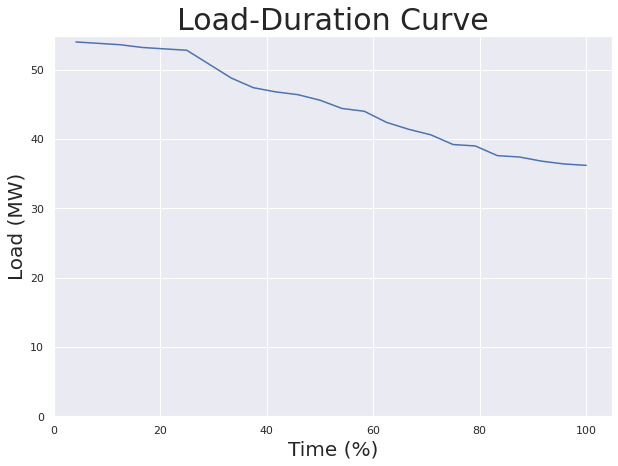

In [ ]:
#Plot the load_duration curve (Load vs Percentage of time)
p = sb.lineplot(x = "percentage", y = "Load", data = load_df_sorted)
plt.ylim(0, None)
plt.xlim(0, None)
p.set_title("Load-Duration Curve", fontsize = 30)
p.set_xlabel("Time (%)", fontsize = 20)
p.set_ylabel("Load (MW)", fontsize = 20)
plt.show()